In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit as Min

In [2]:
data = np.loadtxt('datafile-expresonance.txt')
shape = data.shape
shape

(100000,)

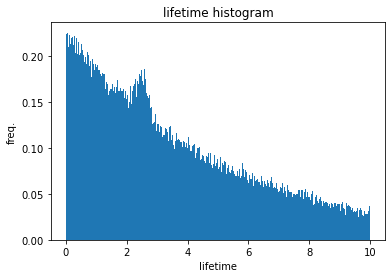

In [3]:
hist = plt.hist(data, density = True, bins = int(np.sqrt(shape)))
plt.xlabel('lifetime')
plt.ylabel('freq.')
plt.title('lifetime histogram')
plt.show()

## CP Part 1

In [4]:
#Parameters
min_A = 0.
max_A = 10.
sigma = .2
exp_F = 0.98
exp_M = 2.5
exp_A = 5.
#F,A,M are to be fit

In [5]:
def bgd(m,A):
    #Normalised exponential background
    if A == 0:
        return 0.
    norm = A*(np.exp(-min_A/A) - np.exp(-max_A/A))
    return np.exp(-m/A)/norm

def signal(m,M):
    #Normalise signal background
    res = np.exp(-0.5*(m-M)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))
    return res #/np.sum(res)

def pdf(m,F,A,M):
    #Total pdf
    P       = F*bgd(m,A) + (1-F)*signal(m,M)
    P[P<=0] = 1e-8
    return P

def NLL(F,A,M):
    #Function to fit using minuit
    return -np.sum(np.log(pdf(current_data,F,A,M)))

In [6]:
#Using minuit to fit negative log likelihood function for parameters
def minuitfit(F_i, A_i,M_i):
    #Function to fit minuit and return results
    pNames = ['F','A','M']
    start = {
    pNames[0]:F_i,
    pNames[1]:A_i,
    pNames[2]:M_i
    }
    minim = Min(NLL,**start)
    minim.errordef = .5
    minim.limits = [(0,1),(min_A,max_A),None]
    result = minim.migrad()
    return result

In [7]:
current_data = data
print(current_data[:5])
result1 = minuitfit(.9,4.,2.)
result1

[7.83638931 2.63155278 0.85325719 2.7245098  0.18853175]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.146e+05                  │              Nfcn = 99               │
│ EDM = 1.39e-05 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F    │  0.9796   │  0.0012   │            │            │    0    │    1    │       │
│ 1 │ A    │   5.008   │   0.031   │            │            │    0    │   10    │       │
│ 2 │ M    │   2.499   │   0.015   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         F         A         M │
├───┼───────────────────────────────┤
│ F │  1.33e-06 -3.99e-06  6.98e-07 │
│ A │ -3.99e-06  0.000945  -1.7e-05 │
│ M │  6.98e-07  -1.7e-05  0.000212 │
└───┴───────────────────────────────┘

In [8]:
np.array(result1.values)

array([0.97960646, 5.00800617, 2.49857008])

In [9]:
np.array(result1.errors)

array([0.00115521, 0.03074838, 0.01457016])

The results are below:

F = 0.9796 +/- 0.0012 (2 sig digs)

A = 5.008  +/- 0.031  (^)

M = 2.499  +/- 0.015  (^)

These results are very close to and within error range of the expected values

## CP Part 2

### NEED TO REDO WITH THE FOLLOWING:
- CREATE A FUNCTION TO JUST FIT M
- VARY F AND A IN THE ERROR RANGES AND FIT FOR M
- USE THE GAUSSIAN SHIFTS TO DETERMINE THE 


In [10]:
#Data generator
def gen_data(N,mini = 0.,maxi = 10.,inc = 0.01):
    data_gen = []
    m_range = np.arange(mini,maxi,inc)
    dist_sig = signal(m_range,exp_M)
    dist_sig = dist_sig/np.sum(dist_sig)
    dist_bgd = bgd(m_range,exp_A)
    dist_bgd = dist_bgd/np.sum(dist_bgd)
    while(len(data_gen)<N):
        rnd = np.random.random()
        #print(rnd)
        if(rnd<exp_F):
            data_gen.append(np.random.choice(m_range,p = dist_bgd))
        else:
            data_gen.append(np.random.choice(m_range,p = dist_sig))
    return np.array(data_gen)

In [11]:
datasets = []
for i in range(5):
    dat = gen_data(10000)
    print(dat[:5])
    datasets.append(dat)
    
datasets = np.array(datasets)
datasets.shape


[1.18 9.59 0.36 7.22 2.42]
[6.64 6.04 1.22 4.05 2.34]
[5.39 4.09 3.18 0.45 0.94]
[0.63 8.56 3.82 6.42 3.45]
[8.43 0.46 3.56 7.93 7.48]


(5, 10000)

In [12]:
'''
#Testing data generator
while(True):
    data_gen = gen_data(10000)
    hist = plt.hist(data_gen, density = True, bins = int(np.sqrt(data_gen.shape[0])))
    plt.xlabel('lifetime')
    plt.ylabel('freq.')
    plt.title('lifetime histogram')
    plt.show()
    
    current_data = data_gen
    res_test = minuitfit(.9,4.,2.)
    print(res_test.values)
'''

"\n#Testing data generator\nwhile(True):\n    data_gen = gen_data(10000)\n    hist = plt.hist(data_gen, density = True, bins = int(np.sqrt(data_gen.shape[0])))\n    plt.xlabel('lifetime')\n    plt.ylabel('freq.')\n    plt.title('lifetime histogram')\n    plt.show()\n    \n    current_data = data_gen\n    res_test = minuitfit(.9,4.,2.)\n    print(res_test.values)\n"

In [13]:
#Toy data generation, and M value estimation
'''
def gen_Ms(n_samples):
    Ms = []
    for i in range(n_samples):
        if(np.mod(i+1,10) == 0):
            print('sample ',(i+1),' generated')
        current_data = gen_data(10000)
        #print(current_data[:5])
        res_temp = minuitfit(.9,4.,2.)
        vals = res_temp.values
        #print(vals)
        M = vals[2]
        Ms.append(M)
    return np.array(Ms)
'''


"\ndef gen_Ms(n_samples):\n    Ms = []\n    for i in range(n_samples):\n        if(np.mod(i+1,10) == 0):\n            print('sample ',(i+1),' generated')\n        current_data = gen_data(10000)\n        #print(current_data[:5])\n        res_temp = minuitfit(.9,4.,2.)\n        vals = res_temp.values\n        #print(vals)\n        M = vals[2]\n        Ms.append(M)\n    return np.array(Ms)\n"

while(True):
    gen_data(100)
    

Ms = gen_Ms(100)
shifts = Ms - exp_M


shifts